Means ot Tajima's $D$ and whatnot over time.  For Bio of Genomes poster.

__NOTE__: the h5 files are a messed up format.  This needs to be fixed when we get back from conference.  This script has to fix this, which is the for loop over statsX.values into a new array, then a new pd.DataFrame

In [1]:
%matplotlib inline
import feather
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
stats1=pd.read_hdf('../H2_0.2_OPT_0.5_mu_0.001.samples.stats.h5')
stats2=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.samples.stats.h5')

In [3]:
x=[]
for i in stats1.values:
    #print type(i[2])
    #print i[2]
    x.append({'gen':i[0],'stat':i[1],'meanval':i[2]})

In [4]:
stats1DF=pd.DataFrame(x)
stats1DF['scaled_time']=stats1DF.gen.subtract(12000.0).divide(1000.0)

In [5]:
x=[]
for i in stats2.values:
    x.append({'gen':i[0],'stat':i[1],'meanval':i[2]})

stats2DF=pd.DataFrame(x)
stats2DF['scaled_time']=stats2DF.gen.subtract(12000.0).divide(1000.0)

Now, we'll make a gridded plot of SFS + LD stats for the two different optima:

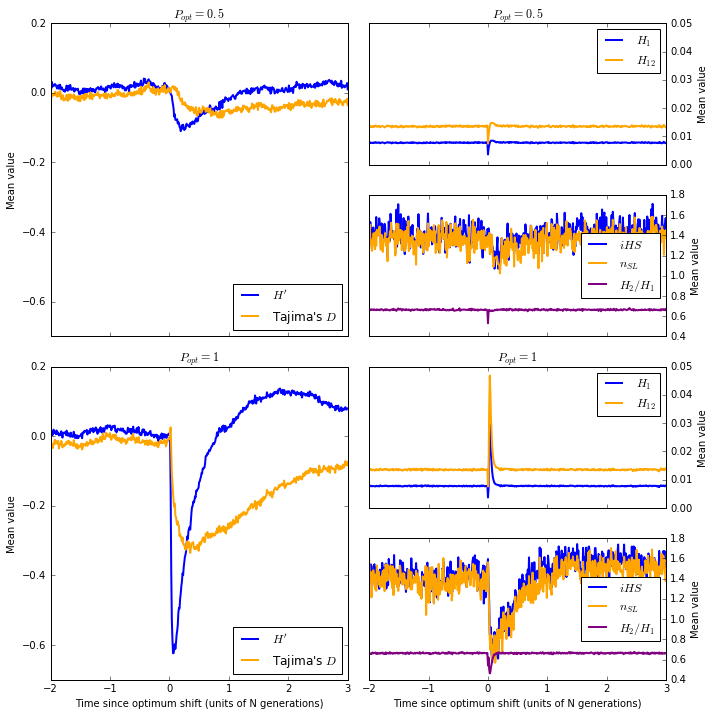

In [54]:
fig=plt.figure(figsize=(10,10))
SFS1 = plt.subplot2grid((4,2),(0,0),rowspan=2,colspan=1,sharex=SFS2,sharey=SFS2)
SFS2 = plt.subplot2grid((4,2),(2,0),rowspan=2,colspan=1)
LD1a = plt.subplot2grid((4,2),(0,1),rowspan=1,sharex=LD2b,sharey=LD2a)
LD1b = plt.subplot2grid((4,2),(1,1),rowspan=1,sharex=LD2b,sharey=LD2b)
LD2a = plt.subplot2grid((4,2),(2,1),rowspan=1,sharex=LD2b)
LD2b = plt.subplot2grid((4,2),(3,1),rowspan=1)

##Only show x axis at bottome
for ax in [SFS1,LD1a,LD1b,LD2a]:
    plt.setp(ax.get_xticklabels(), visible=False)

##for right collumn, ticks on right
for ax in [LD1a,LD1b,LD2a,LD2b]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    
##SFS statistica
SFS1.plot(stats1DF[stats1DF.stat=='hprime'].scaled_time,
         stats1DF[stats1DF.stat=='hprime'].meanval,label=r'$H^\prime$',
         linewidth=2,color='blue')
SFS1.plot(stats1DF[stats1DF.stat=='tajd'].scaled_time,
         stats1DF[stats1DF.stat=='tajd'].meanval,label="Tajima\'s "+r'$D$',
         linewidth=2,color='orange')
SFS1.legend(loc='lower right')
#plt.legend(loc='lower right')

SFS2.plot(stats2DF[stats2DF.stat=='hprime'].scaled_time,
         stats2DF[stats2DF.stat=='hprime'].meanval,label=""+r'$H^\prime$',
         linewidth=2,color='blue')
SFS2.plot(stats2DF[stats2DF.stat=='tajd'].scaled_time,
         stats2DF[stats2DF.stat=='tajd'].meanval,label="Tajima\'s "+r'$D$',
         linewidth=2,color='orange')
SFS2.legend(loc='lower right')
#plt.legend(loc='lower right')

##LD statistics
LD1a.plot(stats1DF[stats1DF.stat=='H1'].scaled_time,
         stats1DF[stats1DF.stat=='H1'].meanval,label=r'$H_1$',
         linewidth=2,color='blue')
LD1a.plot(stats1DF[stats1DF.stat=='H12'].scaled_time,
         stats1DF[stats1DF.stat=='H12'].meanval,label=r'$H_{12}$',
         linewidth=2,color='orange')
LD1a.legend(loc='upper right')

LD1b.plot(stats1DF[stats1DF.stat=='iHS'].scaled_time,
         stats1DF[stats1DF.stat=='iHS'].meanval,label=r'$iHS$',
         linewidth=2,color='blue')
LD1b.plot(stats1DF[stats1DF.stat=='nSL'].scaled_time,
         stats1DF[stats1DF.stat=='nSL'].meanval,label=r'$n_{SL}$',
         linewidth=2,color='orange')
LD1b.plot(stats1DF[stats1DF.stat=='H2H1'].scaled_time,
         stats1DF[stats1DF.stat=='H2H1'].meanval,label=r'$H_2/H_1$',
         linewidth=2,color='purple')
LD1b.legend(loc='center right')

LD2a.plot(stats2DF[stats2DF.stat=='H1'].scaled_time,
         stats2DF[stats2DF.stat=='H1'].meanval,label=r'$H_1$',
         linewidth=2,color='blue')
LD2a.plot(stats2DF[stats2DF.stat=='H12'].scaled_time,
         stats2DF[stats2DF.stat=='H12'].meanval,label=r'$H_{12}$',
         linewidth=2,color='orange')
LD2a.legend(loc='upper right')

LD2b.plot(stats2DF[stats2DF.stat=='iHS'].scaled_time,
         stats2DF[stats2DF.stat=='iHS'].meanval,label=r'$iHS$',
         linewidth=2,color='blue')
LD2b.plot(stats2DF[stats2DF.stat=='nSL'].scaled_time,
         stats2DF[stats2DF.stat=='nSL'].meanval,label=r'$n_{SL}$',
         linewidth=2,color='orange')
LD2b.plot(stats2DF[stats2DF.stat=='H2H1'].scaled_time,
         stats2DF[stats2DF.stat=='H2H1'].meanval,label=r'$H_2/H_1$',
         color='purple',linewidth=2)
LD2b.legend(loc='center right')

##Add axis labels
for ax in [SFS2,LD2b]:
    ax.set_xlabel("Time since optimum shift (units of N generations)")

for ax in [SFS1,SFS2,LD1a,LD1b,LD2a,LD2b]:
    ax.set_ylabel("Mean value")
    
##Add titles
for ax in [SFS1,LD1a]:
    ax.set_title(r'$P_{opt} = 0.5$')
for ax in [SFS2,LD2a]:
    ax.set_title(r'$P_{opt} = 1$')
plt.tight_layout()
plt.savefig('popgenstats.pdf')

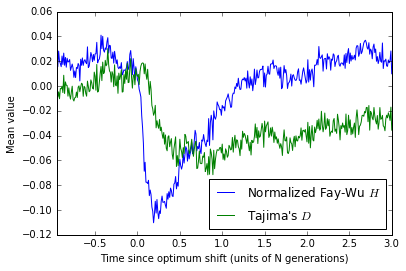

In [108]:
fig=plt.figure()
#plt.plot(stats1DF[stats1DF.stat=='thetapi'].gen,
#         stats1DF[stats1DF.stat=='thetapi'].meanval.divide(100.0),label='r$\pi/\pi_0$')
plt.plot(stats1DF[stats1DF.stat=='hprime'].scaled_time,
         stats1DF[stats1DF.stat=='hprime'].meanval,label="Normalized Fay-Wu "+r'$H$')
plt.plot(stats1DF[stats1DF.stat=='tajd'].scaled_time,
         stats1DF[stats1DF.stat=='tajd'].meanval,label="Tajima\'s "+r'$D$')
plt.xlim(-0.95,3)
plt.ylabel("Mean value")
plt.xlabel("Time since optimum shift (units of N generations)")
plt.legend(loc='lower right')

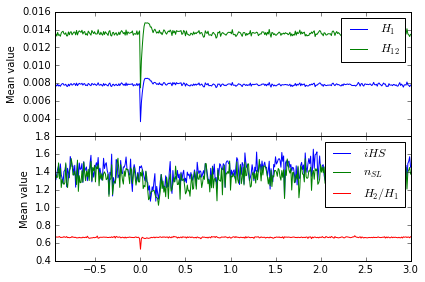

In [112]:
fig=plt.figure()
from matplotlib import gridspec
gs=gridspec.GridSpec(2,1)
ax1=plt.subplot(gs[0])
ax1.plot(stats1DF[stats1DF.stat=='H1'].scaled_time,
         stats1DF[stats1DF.stat=='H1'].meanval,label=r'$H_1$')
ax1.plot(stats1DF[stats1DF.stat=='H12'].scaled_time,
         stats1DF[stats1DF.stat=='H12'].meanval,label=r'$H_{12}$')
plt.ylabel("Mean value")
plt.legend()
ax2=plt.subplot(gs[1],sharex=ax1)
ax2.plot(stats1DF[stats1DF.stat=='iHS'].scaled_time,
         stats1DF[stats1DF.stat=='iHS'].meanval,label=r'$iHS$')
ax2.plot(stats1DF[stats1DF.stat=='nSL'].scaled_time,
         stats1DF[stats1DF.stat=='nSL'].meanval,label=r'$n_{SL}$')
ax2.plot(stats1DF[stats1DF.stat=='H2H1'].scaled_time,
         stats1DF[stats1DF.stat=='H2H1'].meanval,label=r'$H_2/H_1$')
plt.ylabel("Mean value")

plt.xlim(-0.95,3)
plt.legend()
plt.tight_layout()
fig.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
    # The y-ticks will overlap with "hspace=0", so we'll hide the bottom tick
ax1.set_yticks(ax1.get_yticks()[1:])  